# Reddit Survey 

In [177]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [178]:
redditfile = "C:/Reddit/RedditShortDemoSurvey-1-Cleaned.csv"

In [179]:
reddit = pd.read_csv(redditfile)

In [180]:
reddit

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN


The dataframe is 32754 rows × 20 columns

### Data cleaning

In [181]:
reddit.drop("Entry Id", axis=1, inplace=True)

In [182]:
reddit.describe()

,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
count,32754,32754,32754,32754,32754,32754,32754,32754,20846,32754,28419,32752,32754,3,3,1,1,1,1
unique,3,8,7,7,3,3,8,440,52,9,1833,7,17,3,2,1,1,1,1
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,United States,California,"Under $20,000",askreddit,I like dogs.,Other,7/13/11 15:47,public,I like cats.,Other,7/14/11 13:22,public
freq,26418,15802,10428,14814,30526,27488,11046,20967,3401,7892,2123,17149,6562,1,2,1,1,1,1


"Unnamed" entries contain data only for one or two entries

In [183]:
reddit.drop(["Unnamed: 14", "Unnamed: 15", "Unnamed: 16", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19"], axis=1, inplace=True)

Droping US States

In [184]:
reddit.drop("(For U. S. redditors) In which state do you live?", axis=1, inplace=True)

### Aggregating by Continent

Using a dictionary of countries of the library 'geonamescache'

In [185]:
import geonamescache
gc = geonamescache.GeonamesCache().get_countries_by_names()

In [186]:
#Example
print gc["Germany"]["continentcode"]
print gc["Afghanistan"]["continentcode"]
print gc["United States"]["continentcode"]

EU
AS
NA


In [187]:
def searchContinent(country, gc):
    country_name = country.lower().title().strip()
    if country_name in gc.keys():
        return gc[country_name]["continentcode"]
    else:
        return "Missing"

In [188]:
reddit["Continent"] = reddit["Treated country data"].apply(lambda country: searchContinent(country, gc))

In [189]:
sum(reddit["Continent"] == "Missing")

844

In [190]:
reddit = reddit[reddit["Continent"] != "Missing"]

In [191]:
reddit.drop(["Treated country data"], axis=1, inplace=True)

In [192]:
reddit.head()

,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Continent
0,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,"$150,000 or more",getmotivated,none,none,NA
1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,"$150,000 or more",gaming,none,none,NA
2,Female,18-24,Blank,Freelance,none,No,Some college,"Under $20,000",snackexchange,none,none,NA
3,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,"$150,000 or more",spacedicks,none,none,NA
4,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,"$70,000 - $99,999",aww,none,none,NA


### To continue cleaning data, first we'll list the unique values of each column

In [193]:
pd.unique(reddit["Please indicate your gender."])

array(['Male', 'Female', 'None'], dtype=object)

In [194]:
pd.unique(reddit["Please select the category that includes your age."])

array(['25-34', '18-24', '35-44', '45-54', 'Under 18', '55-64',
       '65 or Above', 'None'], dtype=object)

A None doesn't makes sense in the Age category, so the entries will be deleted

In [195]:
reddit = reddit[reddit["Please select the category that includes your age."] != "None"]

In [196]:
pd.unique(reddit["What is your marital status?"])

array(['Blank', 'Married/civil union/domestic partnership',
       'In a relationship', 'Forever Alone', 'Single', 'Engaged', 'Widowed'], dtype=object)

'Blank' doesn't appears to be a missing value in marital status

In [197]:
pd.unique(reddit["What best describes your employment status?"])

array(['Employed full time', 'Freelance',
       'Not employed, but looking for work',
       'Not employed and not looking for work', 'Student', 'None',
       'Retired'], dtype=object)

In [198]:
reddit = reddit[reddit["What best describes your employment status?"] != "None"]

In [199]:
pd.unique(reddit["Are you or have you ever been in military service?"])

array(['none', 'No', 'Yes'], dtype=object)

'none' here will also be deleted

In [200]:
reddit = reddit[reddit["Are you or have you ever been in military service?"] != "none"]

In [201]:
pd.unique(reddit["Do you currently have children under the age of 18 living in your household?"])

array(['No', 'Yes', 'None'], dtype=object)

Entries with 'None' will be deleted

In [202]:
reddit = reddit[reddit["Do you currently have children under the age of 18 living in your household?"] != 'None']

In [203]:
pd.unique(reddit["What best describes your level of education?"])

array(["Bachelor's degree", 'Some college',
       'High school graduate or equivalent',
       'Graduate or professional degree', 'Trade or Vocational degree',
       'Associate degree', 'Some high school', 'None'], dtype=object)

Entries with 'None' will be deleted

In [204]:
reddit = reddit[reddit["What best describes your level of education?"] != 'None']

In [205]:
pd.unique(reddit["Which one of the following ranges includes your total yearly household income before taxes?"])

array(['$150,000 or more', 'none', '$70,000 - $99,999', 'Under $20,000',
       '$40,000 - $49,999', '$50,000 - $69,999', '$100,000 - $149,999',
       '$20,000 - $29,999', '$30,000 - $39,999'], dtype=object)

Entries with 'none' will be deleted

In [206]:
reddit = reddit[reddit["Which one of the following ranges includes your total yearly household income before taxes?"] != 'none']

In [207]:
pd.unique(reddit["Are you a dog or a cat person?"])

array(['I like dogs.', 'I like cats.', 'I like turtles.', 'askreddit',
       'movies', nan, ' Reddit.com'], dtype=object)

In [208]:
#We'll delete entries with incoherent values here: 'askreddit', 'movies', nan, ' Reddit.com'
reddit = reddit[(reddit["Are you a dog or a cat person?"] == 'I like dogs.') |
       (reddit["Are you a dog or a cat person?"] == 'I like cats.') |
       (reddit["Are you a dog or a cat person?"] == 'I like turtles.')]

In [209]:
pd.unique(reddit["If you were a cheese, what cheese would you be?"])

array(['Cheddar', 'American', 'Provolone', 'Munster', 'Swiss', 'Goat',
       'Feta', 'Other', 'Brie', 'Paneer', 'Limburger'], dtype=object)

Apparently, there are no missing values in this column

In [210]:
len(reddit)

30134

We've deleted (32754 - 30134) = 2620 entries with missing values, aprox. 8% of the data

In [211]:
#Changing the name of the columns, to something shorter
reddit.columns

Index([u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?', u'Continent'],
      dtype='object')

In [212]:
reddit.rename(inplace=True, columns=
    {'Please indicate your gender.': 'gender',
    'Please select the category that includes your age.': 'age', 
    'What is your marital status?': 'marital',
    'What best describes your employment status?': 'employment',
    'Are you or have you ever been in military service?': 'military',
    'Do you currently have children under the age of 18 living in your household?': 'childs',
    'What best describes your level of education?': 'education',
    'Which one of the following ranges includes your total yearly household income before taxes?': 'income',
    'Are you a dog or a cat person?': 'animals',
    'If you were a cheese, what cheese would you be?': 'cheese'})

In [213]:
reddit.tail()

,gender,age,marital,employment,military,childs,education,income,treated subreddit data,animals,cheese,Continent
32748,Male,25-34,In a relationship,Employed full time,Yes,No,Bachelor's degree,"$150,000 or more",NaN,I like dogs.,Provolone,AS
32749,Female,18-24,Single,Student,No,No,High school graduate or equivalent,"Under $20,000",NaN,I like cats.,Feta,EU
32751,Male,18-24,In a relationship,Employed full time,No,No,Graduate or professional degree,"$20,000 - $29,999",funny,I like cats.,Other,EU
32752,Male,35-44,In a relationship,Employed full time,No,Yes,Bachelor's degree,"$100,000 - $149,999",NaN,I like cats.,Swiss,NA
32753,Male,18-24,Married/civil union/domestic partnership,Employed full time,No,No,Some college,"$20,000 - $29,999",fffffffuuuuuuuuuuuu,I like cats.,Cheddar,NA


In [214]:
reddit.describe()

,gender,age,marital,employment,military,childs,education,income,treated subreddit data,animals,cheese,Continent
count,30134,30134,30134,30134,30134,30134,30134,30134,26531,30134,30134,30134
unique,3,7,6,6,2,2,7,8,1740,3,11,7
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,"Under $20,000",askreddit,I like dogs.,Other,NA
freq,24260,14518,9521,14093,28148,25494,10296,7603,1966,15788,5989,23005


## EDA

In [215]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rcParams['figure.figsize'] = (20, 15)

Visualizing the distribution of values for each column

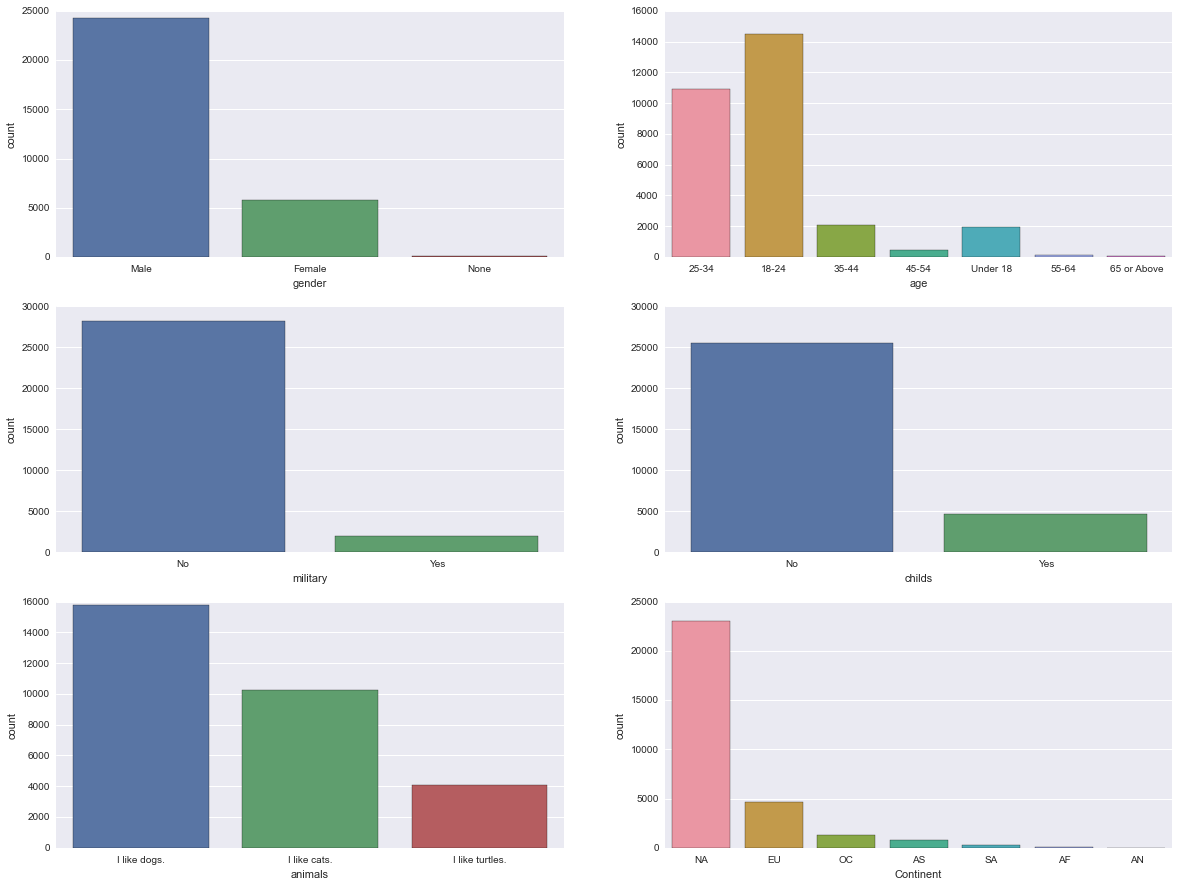

In [216]:
plt.figure(1)
plt.subplot(321)
sns.countplot(x="gender", data=reddit);
plt.subplot(322)
sns.countplot(x="age", data=reddit);
plt.subplot(323)
sns.countplot(x="military", data=reddit);
plt.subplot(324)
sns.countplot(x="childs", data=reddit);
plt.subplot(325)
sns.countplot(x="animals", data=reddit);
plt.subplot(326)
sns.countplot(x="Continent", data=reddit);

Looking at these graphs we can conclude that most of Reddit users are males, 18 to 34 years old from North America, have no childs and never served in the military

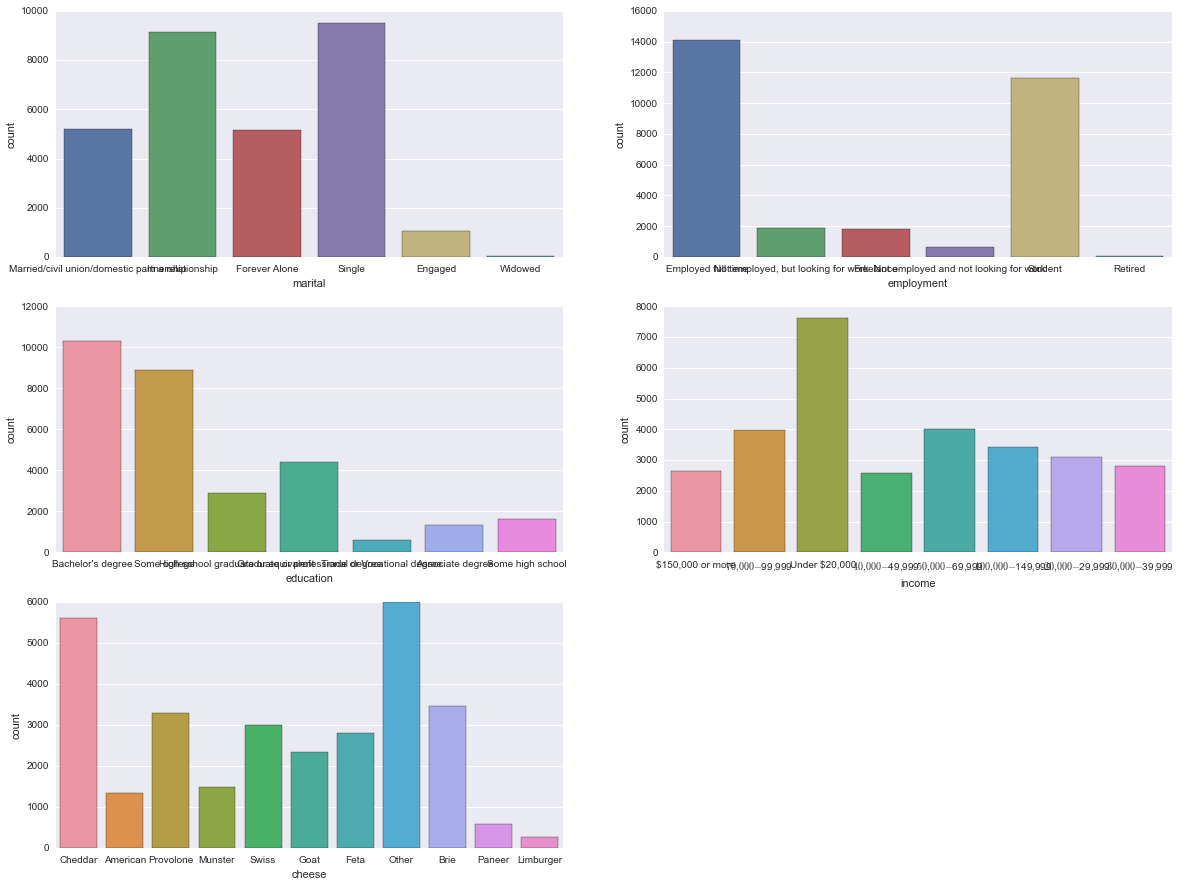

In [217]:
plt.figure(2)
plt.subplot(321)
sns.countplot(x="marital", data=reddit);
plt.subplot(322)
sns.countplot(x="employment", data=reddit);
plt.subplot(323)
sns.countplot(x="education", data=reddit);
plt.subplot(324)
sns.countplot(x="income", data=reddit);
plt.subplot(325)
sns.countplot(x="cheese", data=reddit);

Column 'subreddit' have too many different classes to visualize

Creation of indicator variables

In [218]:
reddit_ind = pd.get_dummies(data=reddit[['gender', 'age', 'marital', 'employment', 'military', 'childs', 
                        'education', 'income', 'animals', 'cheese', 'Continent']])

In [219]:
reddit_ind.head()

,gender_Female,gender_Male,gender_None,age_18-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65 or Above,age_Under 18,...,cheese_Paneer,cheese_Provolone,cheese_Swiss,Continent_AF,Continent_AN,Continent_AS,Continent_EU,Continent_NA,Continent_OC,Continent_SA
5,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
9,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [220]:
corr = reddit_ind.corr()

In [221]:
corr

,gender_Female,gender_Male,gender_None,age_18-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65 or Above,age_Under 18,...,cheese_Paneer,cheese_Provolone,cheese_Swiss,Continent_AF,Continent_AN,Continent_AS,Continent_EU,Continent_NA,Continent_OC,Continent_SA
gender_Female,1.000000,-0.985385,-0.032888,0.048469,-0.035179,-0.028282,0.008984,0.009357,0.019209,-0.010899,...,0.014452,-0.025318,-0.038453,-0.009725,-0.003950,-0.022532,-0.099408,0.109201,-0.020603,-0.022646
gender_Male,-0.985385,1.000000,-0.137844,-0.044766,0.031737,0.026899,-0.008142,-0.008511,-0.022350,0.011447,...,-0.015173,0.026434,0.037467,0.010338,0.004009,0.022615,0.096491,-0.106373,0.019662,0.022595
gender_None,-0.032888,-0.137844,1.000000,-0.019168,0.018331,0.006623,-0.004463,-0.004465,0.019449,-0.003790,...,0.004993,-0.007887,0.003753,-0.004106,-0.000553,-0.001679,0.011859,-0.010816,0.004431,-0.000900
age_18-24,0.048469,-0.044766,-0.019168,1.000000,-0.727572,-0.263289,-0.120314,-0.063467,-0.042342,-0.253064,...,-0.017096,0.000778,0.022213,-0.015413,-0.007855,-0.037563,-0.012379,0.027914,0.002554,-0.010770
age_25-34,-0.035179,0.031737,0.018331,-0.727572,1.000000,-0.206050,-0.094158,-0.049670,-0.033137,-0.198048,...,0.029276,0.011566,-0.031749,0.017270,0.010797,0.038656,0.017895,-0.033376,-0.004864,0.016187
age_35-44,-0.028282,0.026899,0.006623,-0.263289,-0.206050,1.000000,-0.034073,-0.017974,-0.011991,-0.071668,...,-0.004427,-0.017282,-0.009962,-0.001370,-0.002225,0.007733,0.008126,-0.012697,0.008833,-0.005267
age_45-54,0.008984,-0.008142,-0.004463,-0.120314,-0.094158,-0.034073,1.000000,-0.008214,-0.005480,-0.032750,...,-0.007437,-0.007981,0.013615,-0.003074,-0.001017,-0.009996,-0.024872,0.027517,-0.002043,-0.005630
age_55-64,0.009357,-0.008511,-0.004465,-0.063467,-0.049670,-0.017974,-0.008214,1.000000,-0.002891,-0.017276,...,-0.009148,-0.003456,-0.001558,0.004412,-0.000536,-0.004275,-0.019699,0.019962,-0.001928,-0.006081
age_65 or Above,0.019209,-0.022350,0.019449,-0.042342,-0.033137,-0.011991,-0.005480,-0.002891,1.000000,-0.011526,...,-0.006103,-0.005600,0.003126,0.035006,-0.000358,-0.007125,-0.004080,0.003067,-0.002134,-0.004057
age_Under 18,-0.010899,0.011447,-0.003790,-0.253064,-0.198048,-0.071668,-0.032750,-0.017276,-0.011526,1.000000,...,-0.010704,-0.000432,0.020321,-0.006922,-0.002138,0.000157,0.000171,0.002045,-0.002898,0.000836


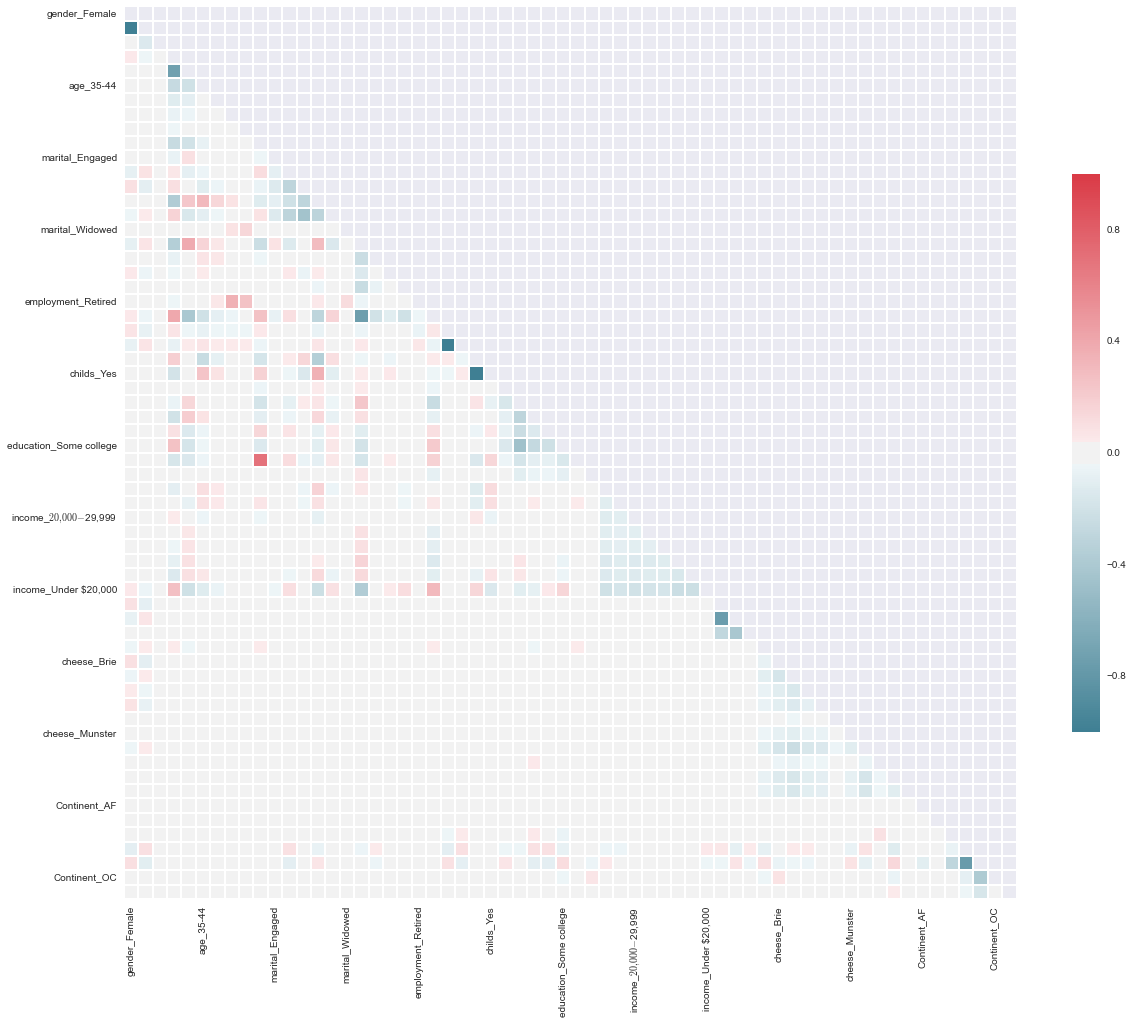

In [222]:
import numpy as np
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Apparently there are a few strong correlations. We'll search for them in the matrix

In [223]:
#To remove the diagonal and anything above
corr2 = corr
corr2.loc[:,:] = np.tril(corr2, k=-1)

In [224]:
corr2.stack().order()

military_Yes                                      military_No                                        -1.000000
childs_Yes                                        childs_No                                          -1.000000
gender_Male                                       gender_Female                                      -0.985385
Continent_NA                                      Continent_EU                                       -0.767148
animals_I like dogs.                              animals_I like cats.                               -0.754979
employment_Student                                employment_Employed full time                      -0.743769
age_25-34                                         age_18-24                                          -0.727572
education_Some college                            education_Bachelor's degree                        -0.466518
marital_Single                                    marital_In a relationship                          -0.448608
a

The correlations between different indicator variables of the same column are expected and don't give information. 

Apart from those, the more highly correlated variables are:

education_Some high school - age_Under 18 -- 0.694725

employment_Employed full time - age_25-34 -- 0.390066

employment_Student - age_18-24 --  0.40068

employment_Student - age_25-34 -- -0.412515

marital_Married/civil union/domestic partnership - age_35-44 -- 0.311752

employment_Employed full time - age_18-24 -- 0.354963

employment_Retired - age_55-64 -- 0.356190

childs_Yes - marital_Married/civil union/domestic partnership -- 0.358457

The correlations with the age are very logical: users under 18 are in High School, from 18 to 24 are Students, and from 25 to 34 are Employed, from 35 to 44 are Married and from 55 to 64 are Retired. Also is very logical the correlation of being Married with having children

### Prediction Model

We'll create a Random Forest prediction model

In [225]:
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

According to the scikit-learn RandomForest page: "The main parameters to adjust when using these methods is n_estimators and max_features"

In [226]:
param_grid = {'n_estimators': range(100, 601, 100), 'max_features': ['auto', 'log2', None]}

In [227]:
search = GridSearchCV(RandomForestClassifier(n_jobs=2), param_grid, cv=5)

Getting the target and the dataset, and separating a testing and training set

In [228]:
y = reddit['income']
X = pd.get_dummies(data=reddit[['gender', 'age', 'marital', 'employment', 'military', 'childs', 
                        'education', 'animals', 'cheese', 'Continent']])

In [229]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)

Finding the best parameters, and training the model (in the same step)

In [230]:
forest = search.fit(X_train, y_train)

Best parameters found by grid search: 

In [231]:
print(forest.best_params_)
print(forest.best_score_)

{'max_features': 'log2', 'n_estimators': 600}
0.291039823009


In [232]:
y_pred = forest.predict(X_test)

Computing the confussion matrix

In [233]:
print metrics.confusion_matrix(y_test, y_pred)

[[ 71  41  19  18  12  43  56  95]
 [ 34  23  10   8   8  25  40 105]
 [ 14   2  38  27  19  46  25 129]
 [ 16  12  26  25  23  53  37  90]
 [ 12   7  24  21  17  58  26  57]
 [ 50   9  30  32  25 108  58 105]
 [ 73  25  23  23  22  84  74  94]
 [ 32  30  70  25  26  44  32 508]]


In [234]:
print metrics.classification_report(y_test, y_pred)

             precision    recall  f1-score   support

$100,000 - $149,999       0.24      0.20      0.22       355
$150,000 or more       0.15      0.09      0.11       253
$20,000 - $29,999       0.16      0.13      0.14       300
$30,000 - $39,999       0.14      0.09      0.11       282
$40,000 - $49,999       0.11      0.08      0.09       222
$50,000 - $69,999       0.23      0.26      0.25       417
$70,000 - $99,999       0.21      0.18      0.19       418
Under $20,000       0.43      0.66      0.52       767

avg / total       0.25      0.29      0.26      3014



Computing Accuracy on the complete set using 5 fold cross validation

In [235]:
cross_validation.cross_val_score(forest.best_estimator_ , X, y, scoring='accuracy', cv=5)

array([ 0.29535655,  0.29855697,  0.29727936,  0.29266268,  0.28972273])

Also precision and recall

In [236]:
print cross_validation.cross_val_score(forest.best_estimator_ , X, y, scoring='precision_micro', cv=5).mean()
print cross_validation.cross_val_score(forest.best_estimator_ , X, y, scoring='recall_micro', cv=5).mean()

0.293288780673
0.292856298013


These metrics are not particularly good. The model seems unable to predict the income using the other variables

### Computing the AUC

According to the scikit-learn page for the example of Receiver Operating Characteristic (ROC) metric to evaluate classifier output quality.: "ROC curves are typically used in binary classification to study the output of a classifier. In order to extend ROC curve and ROC area to multi-class or multi-label classification, it is necessary to binarize the output. "

(Code adapted from the example at http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

In [237]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

In [238]:
y2 = label_binarize(y, classes=y.unique())
n_classes = y2.shape[1]
X_train2, X_test2, y_train2, y_test2 = cross_validation.train_test_split(X, y2, test_size=0.20)

In [239]:
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=600, max_features='log2'))
classifier = classifier.fit(X_train2, y_train2)
y_score = classifier.predict(X_test2)

In [240]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test2.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

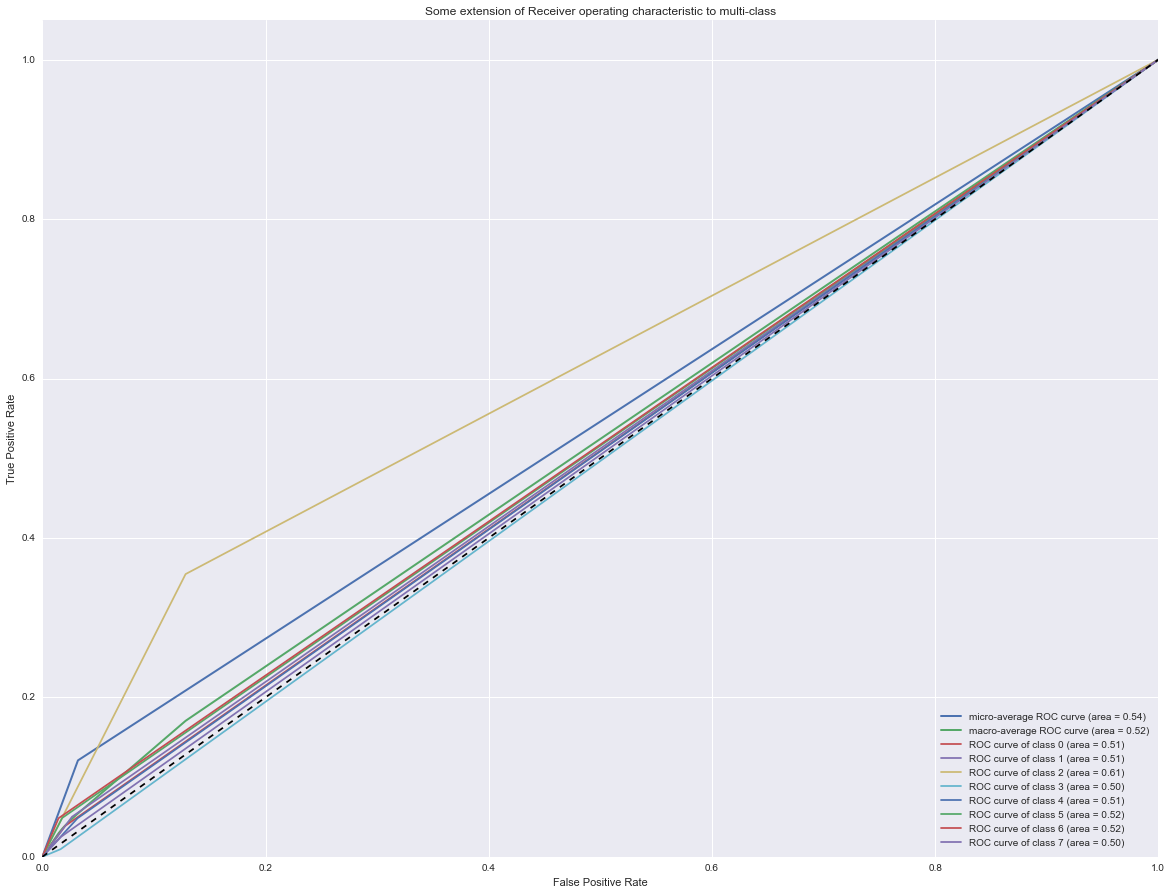

In [241]:
from scipy import interp
# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         linewidth=2)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()